In [1]:
import pandas as pd
from flaml import AutoML
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import evalml
%matplotlib inline

# Data Pre-processing

In [2]:
data = pd.read_csv('all_years_v2.csv')

t1 = data[data.test == 'test1'][['uid', 'semester', 'topic_01', 'topic_02', 'topic_03', 'topic_04', 'scaled_score']]
t2 = data[data.test == 'test2'][['uid', 'semester', 'topic_05', 'topic_06', 'topic_07', 'scaled_score']]

In [3]:
data.head()

,uid,semester,test,topic_01,topic_02,topic_03,topic_04,topic_05,topic_06,topic_07,...,problem_09-115A-ch,problem_09-317A-bk,problem_05-709A-bk,problem_09-318A-bk,problem_09-329A-bk,problem_05-712A-bk,problem_05-707A-bk,problem_03-524A-bk,problem_09-315A-bk,problem_08-513A-bk
0,aae,spring,test1,0.000000,-0.333333,0.0,-0.333333,0.000000,0.0,0,...,0,0,0,0,0,0,0,-1,0,0
1,aae,spring,test2,0.000000,0.000000,0.0,0.000000,1.000000,1.0,1,...,0,0,0,0,0,0,0,0,0,0
2,abharati,fall16,test1,-0.333333,-1.000000,1.0,0.333333,0.000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,abharati,fall16,test2,0.000000,0.000000,0.0,0.000000,0.333333,1.0,-1,...,0,0,0,0,0,0,0,0,0,0
4,achauaa,fall17,test1,-1.000000,1.000000,1.0,1.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
t12 = t1.merge(t2, on=['uid', 'semester']).drop('scaled_score_x', axis=1)
t12.rename(columns={'scaled_score_y': 'scaled_score'}, inplace=True)

In [5]:
t12.head()

,uid,semester,topic_01,topic_02,topic_03,topic_04,topic_05,topic_06,topic_07,scaled_score
0,aae,spring,0.000000,-0.333333,0.000000,-0.333333,1.000000,1.0,1,0.068330
1,abharati,fall16,-0.333333,-1.000000,1.000000,0.333333,0.333333,1.0,-1,-0.481942
2,achauaa,fall17,-1.000000,1.000000,1.000000,1.000000,0.333333,1.0,1,0.599341
3,agintan,fall17,0.000000,0.333333,-1.000000,1.000000,-1.000000,1.0,-1,1.046445
4,agoswami,fall,1.000000,0.333333,0.333333,1.000000,0.333333,1.0,1,1.430430


In [6]:
t12.dtypes

uid              object
semester         object
topic_01        float64
topic_02        float64
topic_03        float64
topic_04        float64
topic_05        float64
topic_06        float64
topic_07          int64
scaled_score    float64
dtype: object

In [7]:
t12.isnull().sum()

uid             0
semester        0
topic_01        0
topic_02        0
topic_03        0
topic_04        0
topic_05        0
topic_06        0
topic_07        0
scaled_score    0
dtype: int64

In [8]:
cc = []
for topic in ['01','02','03','04','05','06', '07']:
    k = []
    for q in data.columns:
        if q[8:10] == topic:
            k.append(q)
    cc.append(k)

In [9]:
nan_06 = pd.DataFrame(abs(data[cc[-2]]).sum(axis=1), columns=['06'])
nan_07 = pd.DataFrame(abs(data[cc[-1]]).sum(axis=1), columns=['07'])
nan = nan_06.join(nan_07)
nan_check = data[['uid', 'semester','test', 'topic_06', 'topic_07']].join([nan_06, nan_07])

In [10]:
nan_06 = nan_check[nan_check['topic_06'].isnull()]
nan_07 = nan_check[nan_check['topic_07'].isnull()]
print('Question assigned in topic 06 with NaN score recorded:', nan_06['06'].unique())
print('Question assigned in topic 07 with NaN score recorded:', nan_07['07'].unique())

Question assigned in topic 06 with NaN score recorded: []
Question assigned in topic 07 with NaN score recorded: []


### Score Distribution for Topic 1-7

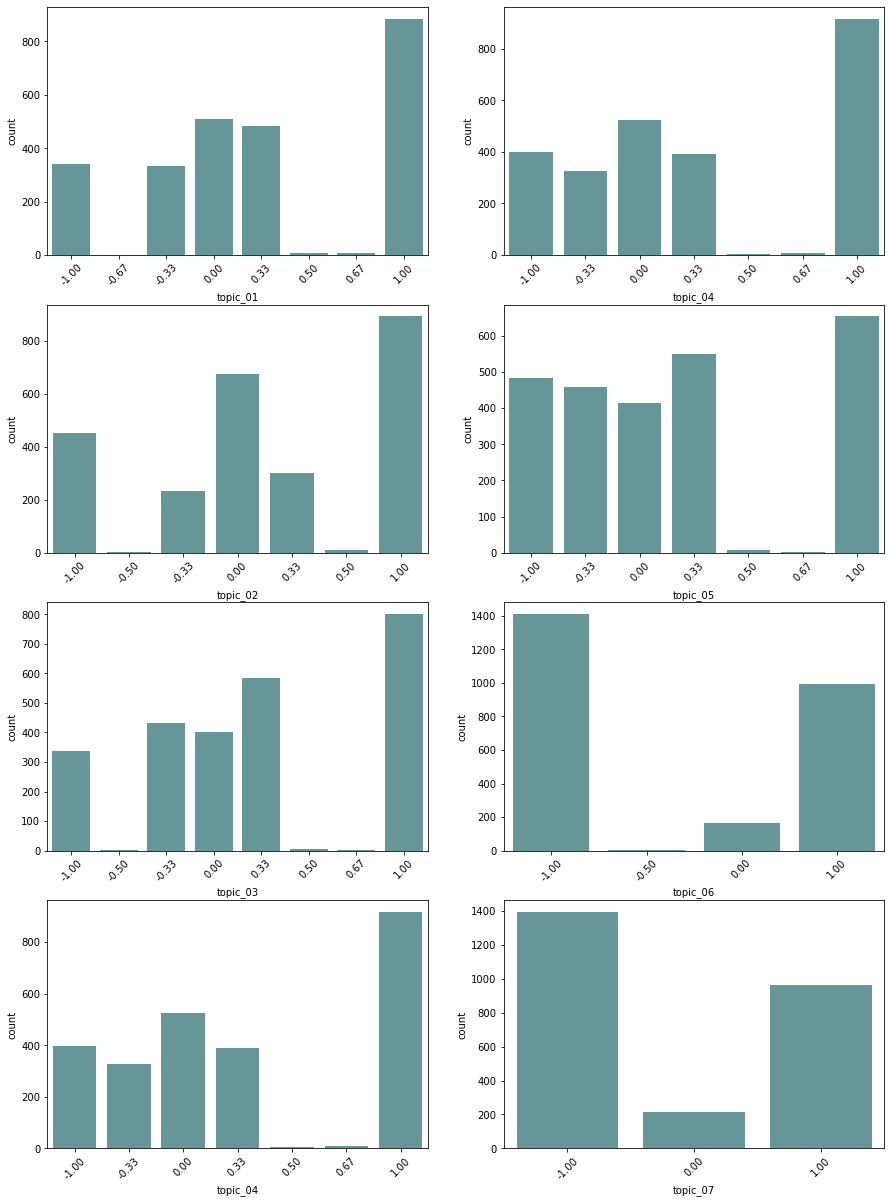

In [11]:
fig, ax = plt.subplots(4, 2, figsize=(15,21))

for i in range(4):
    sns.countplot(x=t12['topic_0{}'.format(i+1)], color='cadetblue', ax=ax[i,0])
    tick = [item.get_text() for item in ax[i,0].get_xticklabels()]
    ax[i,0].set_xticklabels(['%.2f' % float(j) for j in tick], rotation=45)
    sns.countplot(x=t12['topic_0{}'.format(i+4)], color='cadetblue', ax=ax[i,1])
    tick = [item.get_text() for item in ax[i,1].get_xticklabels()]
    ax[i,1].set_xticklabels(['%.2f' % float(j) for j in tick], rotation=45)

In [12]:
for i in cc:
    print('Number of questions assigned in Topic {}: \n{}'.format(cc.index(i)+1, abs(data.loc[:, i]).sum(axis=1).value_counts()), '\n')

Number of questions assigned in Topic 1: 
0    2579
3    1342
2    1268
1       6
dtype: int64 

Number of questions assigned in Topic 2: 
0    2579
2    1688
3     916
1      12
dtype: int64 

Number of questions assigned in Topic 3: 
0    2579
3    1703
2     904
1       9
dtype: int64 

Number of questions assigned in Topic 4: 
0    2579
2    1372
3    1237
1       7
dtype: int64 

Number of questions assigned in Topic 5: 
0    2617
3    1674
2     896
1       8
dtype: int64 

Number of questions assigned in Topic 6: 
0    2619
1    2161
2     415
dtype: int64 

Number of questions assigned in Topic 7: 
0    2619
1    2099
2     477
dtype: int64 



### Convert NaN to Zero and Remove Rows with Invalid Topic scores

In [13]:
t12_fill = t12.fillna(0)

In [14]:
t12_fill_bound = t12_fill[
    (~round(t12_fill.topic_01, 2).isin([-0.67, -0.5, 0.5, 0.67])) &
    (~round(t12_fill.topic_02, 2).isin([-0.67, -0.5, 0.5, 0.67])) &
    (~round(t12_fill.topic_03, 2).isin([-0.67, -0.5, 0.5, 0.67])) &
    (~round(t12_fill.topic_04, 2).isin([-0.67, -0.5, 0.5, 0.67])) &
    (~round(t12_fill.topic_05, 2).isin([-0.67, -0.5, 0.5, 0.67])) &
    (~round(t12_fill.topic_06, 2).isin([-0.67, -0.5, 0.5, 0.67])) &
    (~round(t12_fill.topic_07, 2).isin([-0.67, -0.5, 0.5, 0.67])) 
    
]

t12_fill_bound = t12_fill_bound.reset_index(drop=1)

### Score Distribution for Topic 1-7 after Data Cleaning

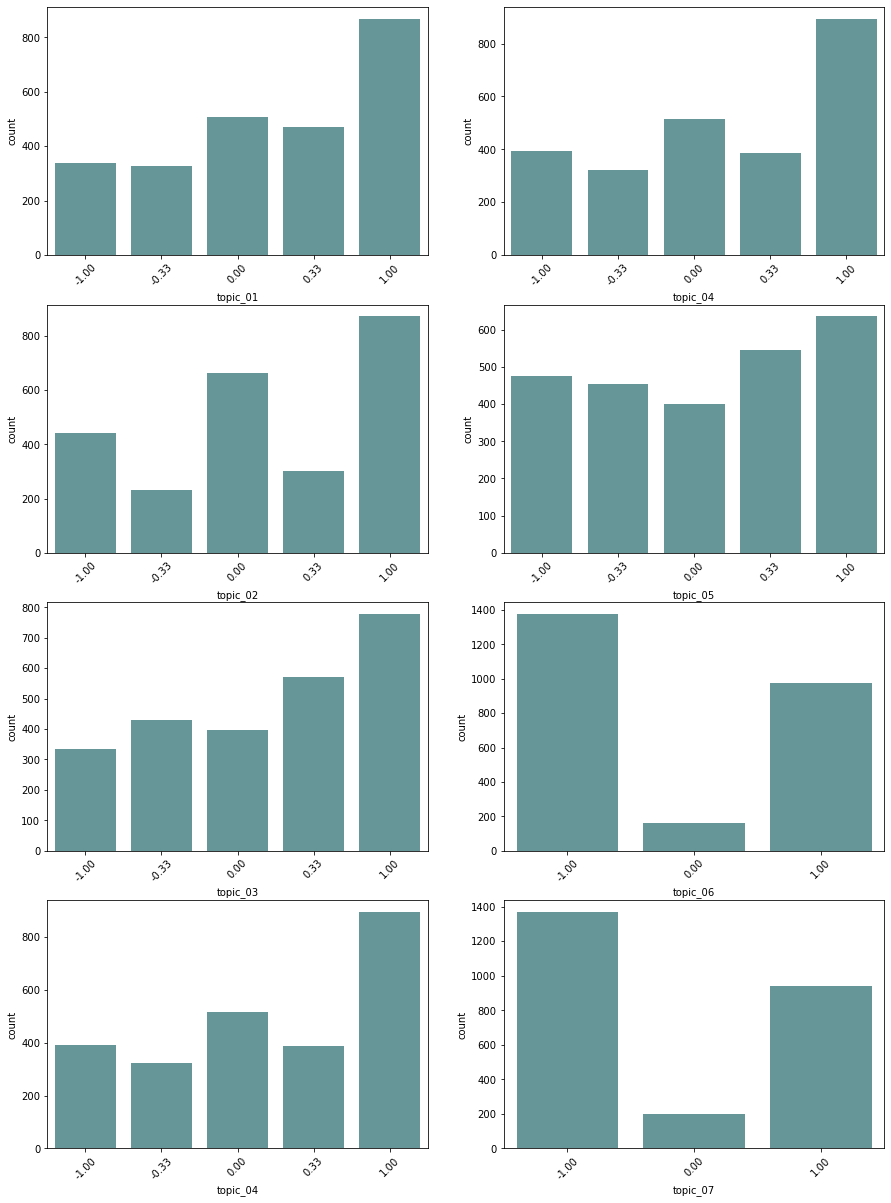

In [15]:
fig, ax = plt.subplots(4, 2, figsize=(15,21))

for i in range(4):
    sns.countplot(x=t12_fill_bound['topic_0{}'.format(i+1)], color='cadetblue', ax=ax[i,0])
    tick = [item.get_text() for item in ax[i,0].get_xticklabels()]
    ax[i,0].set_xticklabels(['%.2f' % float(j) for j in tick], rotation=45)
    sns.countplot(x=t12_fill_bound['topic_0{}'.format(i+4)], color='cadetblue', ax=ax[i,1])
    tick = [item.get_text() for item in ax[i,1].get_xticklabels()]
    ax[i,1].set_xticklabels(['%.2f' % float(j) for j in tick], rotation=45)


All invalid values removed.

# EDA

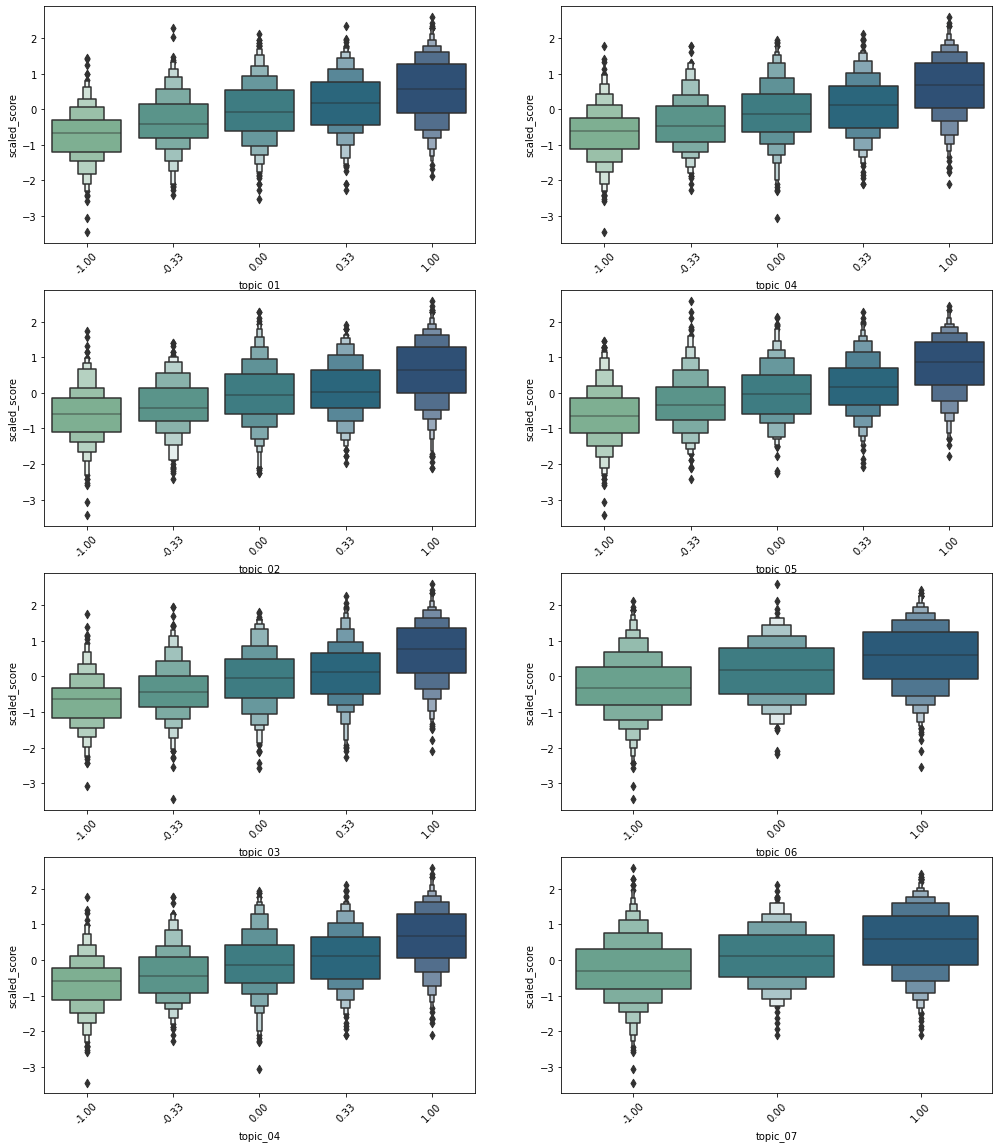

In [16]:
fig, ax = plt.subplots(4, 2, figsize=(17,20))

for i in range(4):
    sns.boxenplot(data=t12_fill_bound, y='scaled_score', x='topic_0{}'.format(i+1), ax=ax[i, 0], palette="crest")
    tick = [item.get_text() for item in ax[i,0].get_xticklabels()]
    ax[i,0].set_xticklabels(['%.2f' % float(j) for j in tick], rotation=45)
    sns.boxenplot(data=t12_fill_bound, y='scaled_score', x='topic_0{}'.format(i+4), ax=ax[i, 1], palette="crest")
    tick = [item.get_text() for item in ax[i,1].get_xticklabels()]
    ax[i,1].set_xticklabels(['%.2f' % float(j) for j in tick], rotation=45)

The boxen plot for topics 1-7 show a general trend for higher the topic scores, higher the target score, but none are significantly important in discriminating the students that performed very good and bad, as most scaled score span over -2 to 2 region even if the student did well in specific topics.

In [17]:
data.semester.unique()

array(['spring', 'fall16', 'fall17', 'fall', 'spring17'], dtype=object)

spring16 data is missing compare to all_years_v1

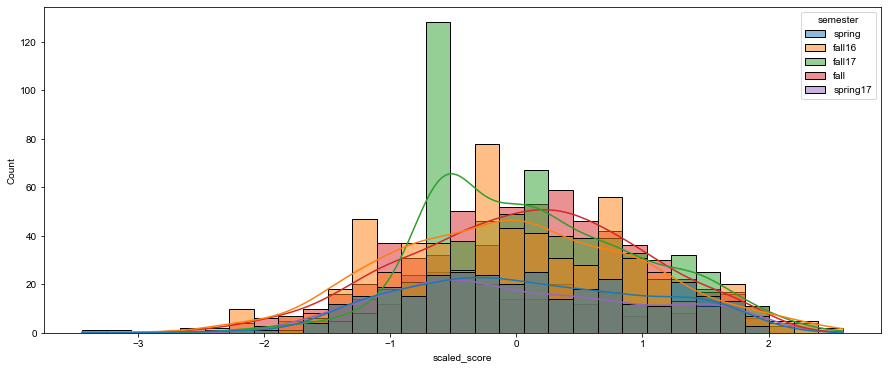

In [18]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(data=t12_fill_bound, x='scaled_score', kde=1, hue='semester')
sns.set_style("white")

It is subtle to see the difference for fall and spring semester, where fall semester is more normally distributed, while fall semesters are flat across -0.5 to 1.5 scaled score. We'll consider encoding this information to the dataset, but we'll first determine if the difference is caused by chance.

The fall 17 has abnormal spike at ~ -0.5 region, need to confirm what may be wrong.

### Random Permutation Test for Spring / Fall Term Distribution Difference

In [19]:
fall_scaled_score = t12_fill_bound[t12_fill_bound.semester.str.contains('fall')].scaled_score
spring_scaled_score = t12_fill_bound[t12_fill_bound.semester.str.contains('spring')].scaled_score

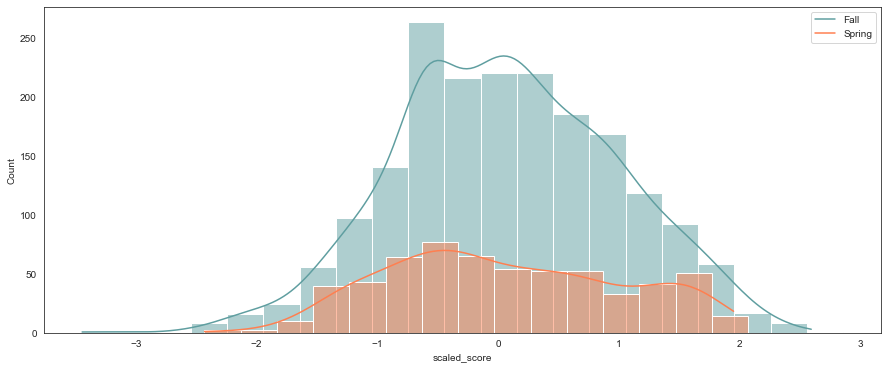

In [20]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(data=fall_scaled_score, kde=1, color='cadetblue',binwidth=0.3)
sns.histplot(data=spring_scaled_score, kde=1, color='coral',binwidth=0.3)
ax.legend(['Fall', 'Spring'])

In [21]:
print('Fall semesters mean = %.4f, median = %.4f' % (fall_scaled_score.mean(), fall_scaled_score.median()))
print('Spring semesters mean = %.4f, median = %.4f' % (spring_scaled_score.mean(), spring_scaled_score.median()))

Fall semesters mean = 0.0662, median = 0.0274
Spring semesters mean = 0.0645, median = -0.0437


In [22]:
def perm_fun(x, nB, nA):
    n = nA + nB
    index = np.arange(n)
    np.random.default_rng().shuffle(index) 
    mean = x.loc[index[:nB]].mean() - x.loc[index[nB:]].mean()
    median = x.loc[index[:nB]].median() - x.loc[index[nB:]].median()
    return [mean, median]

perm_diffs = np.array([perm_fun(t12_fill_bound.scaled_score, len(fall_scaled_score), len(spring_scaled_score)) for _ in range(1000)])

Text(0.5, 1.0, 'Median Difference')

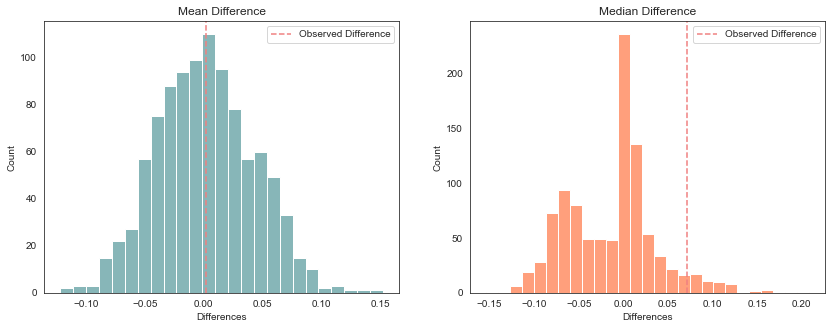

In [23]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(perm_diffs[:,0], color='cadetblue', ax=ax[0])
ax[0].axvline(x=(fall_scaled_score.mean() - spring_scaled_score.mean()), color='lightcoral', linestyle='--')
ax[0].set_xlabel('Differences')
ax[0].legend(['Observed Difference'])
ax[0].set_title('Mean Difference')

sns.histplot(perm_diffs[:,1], color='coral', ax=ax[1])
ax[1].axvline(x=(fall_scaled_score.median() - spring_scaled_score.median()), color='lightcoral', linestyle='--')
ax[1].set_xlabel('Differences')
ax[1].legend(['Observed Difference'])
ax[1].set_title('Median Difference')

In [24]:
print('P value for MEAN observed difference: %.3f' % 
      np.mean(np.array(perm_diffs) > (fall_scaled_score.mean() - spring_scaled_score.mean())))
print('P value for MEDIAN observed difference: %.3f' % 
      np.mean(np.array(perm_diffs) > (fall_scaled_score.median() - spring_scaled_score.median())))

P value for MEAN observed difference: 0.439
P value for MEDIAN observed difference: 0.053


The large P value for mean from permutation test suggests that the mean differences for spring and fall semesters are potentially caused by chance of variation. However, the median tells significantly different result.

# Grade Distribution Setting

In [25]:
def letter_grade_cal(z_scores, cutoff):
    
    letter_grade_cut_off = cutoff
    g_n_list = []
    
    for i in z_scores:
        g_n = 0
        while i > letter_grade_cut_off[g_n]:
            g_n += 1
            if g_n == len(cutoff):
                break
        g_n_list.append(g_n)
    
    
    return pd.Series(g_n_list)

In [26]:
co = [-1.4, -1.0, -0.6, -0.2, 0.25, 0.8, 1.4, 1.8]

Cut off division is determined by experience with grade distribution.

In [27]:
X = t12_fill_bound.iloc[:,2:-1].reset_index(drop=True)
y= letter_grade_cal(t12_fill_bound.scaled_score, co)

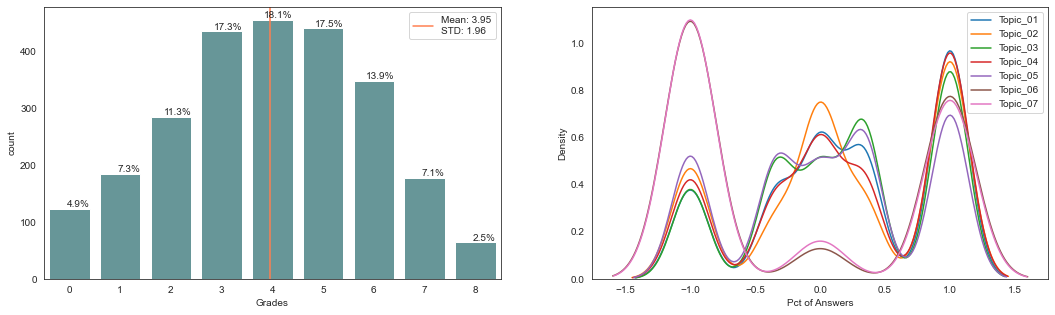

In [28]:
fig, ax = plt.subplots(1,2,figsize=(18,5))

sns.countplot(x=y, ax=ax[0], color='cadetblue')
ax[0].set_xlabel('Grades')
ax[0].axvline(y.mean(), color='coral')
ax[0].legend(['Mean: %.2f\nSTD: %.2f' %(y.mean(), y.std())])

for p in ax[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(y))
    x_i = p.get_x() + p.get_width()
    y_i = p.get_height()
    ax[0].annotate(percentage, (x_i, y_i),ha='right',va='bottom')

for i in range(len(X.columns)):
    sns.kdeplot(data=X, x='topic_0{}'.format(i+1), ax=ax[1])
ax[1].set_xlabel('Pct of Answers')
ax[1].legend(['Topic_0{}'.format(i+1) for i in range(len(X.columns))])

All topic features does not match the distribution of target grades, especially at both end where density is expected to be low but appeared high.

# Logistic Regression Modelling

#### Topic-based Dataset

In [29]:
X = t12_fill_bound.iloc[:,2:-1].reset_index(drop=True)
y= letter_grade_cal(t12_fill_bound.scaled_score, co)

#### Topic-based + Semester Dataset

In [30]:
t12_fill_bound_sem = t12_fill_bound.copy()
t12_fill_bound_sem.loc[:,'sem'] = t12_fill_bound.apply(lambda x: '1' if 'fall' in x.semester else '0', axis=1)
X_sem = t12_fill_bound_sem.drop(['uid', 'semester', 'scaled_score'], axis=1)
y_sem = letter_grade_cal(t12_fill_bound.scaled_score, co)

#### Topic-based + STD of Topic 1-7 Scores Dataset

In [31]:
t12_fill_bound_std = t12_fill_bound.copy()
t12_fill_bound_std['std'] = t12_fill_bound.iloc[:, 2:-1].std(axis=1)
X_std = t12_fill_bound_std.drop(['uid', 'semester', 'scaled_score'], axis=1)
y_std = letter_grade_cal(t12_fill_bound.scaled_score, co)

#### Topic-based + Semester + STD of Topic 1-7 Scores Dataset

In [32]:
t12_fill_bound_sem_std = t12_fill_bound.copy()
t12_fill_bound_sem_std.loc[:,'sem'] = t12_fill_bound.apply(lambda x: '1' if 'fall' in x.semester else '0', axis=1)
t12_fill_bound_sem_std['std'] = t12_fill_bound.iloc[:, 2:-1].std(axis=1)
X_sem_std = t12_fill_bound_sem_std.drop(['uid', 'semester', 'scaled_score'], axis=1)
y_sem_std = letter_grade_cal(t12_fill_bound.scaled_score, co)

In [33]:
Xy_list = [[X, y], [X_sem, y_sem], [X_std, y_std], [X_sem_std, y_sem_std]]

In [34]:
def lr(X, y):
    logistic_r = LogisticRegression(max_iter=1000)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    logistic_r.fit(X_train, y_train)
    return (logistic_r.predict(X_test), y_test)

In [35]:
score_list = []
score_one_sub_diff = []

for i in Xy_list:
    score = []
    score_sub = []
    for _ in range(100):
        pred, y_test = lr(i[0], i[1])
        score.append(accuracy_score(y_test, pred))
        score_sub.append((abs(pred-y_test)<=1).sum()/len(y_test))
    score_list.append(score)
    score_one_sub_diff.append(score_sub)

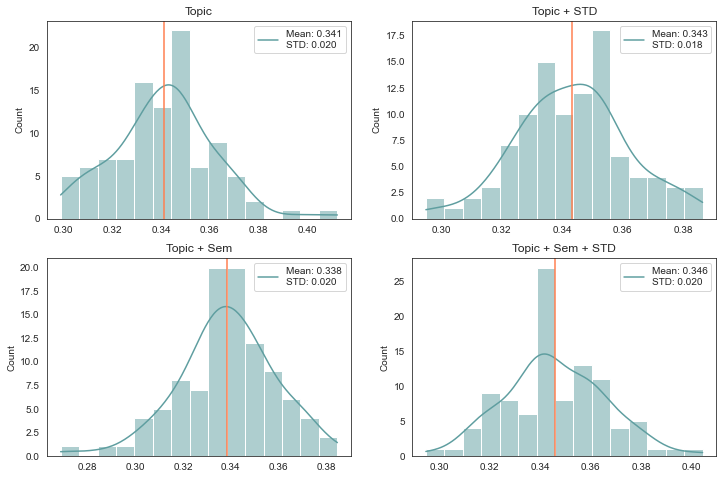

In [36]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
title = ['Topic', 'Topic + Sem', 'Topic + STD', 'Topic + Sem + STD']

for i in range(2):
    sns.histplot(x=score_list[i], bins=15, ax=ax[i,0], kde=1, color='cadetblue')
    sns.histplot(x=score_list[i+2], bins=15, ax=ax[i,1], kde=1, color='cadetblue')
    ax[i,0].axvline(x=np.mean(score_list[i]), color='coral')
    ax[i,1].axvline(x=np.mean(score_list[i+2]), color='coral')
    ax[i,0].legend(['Mean: %.3f\nSTD: %.3f' % (np.mean(score_list[i]), np.std(score_list[i]))])
    ax[i,1].legend(['Mean: %.3f\nSTD: %.3f' % (np.mean(score_list[i+2]), np.std(score_list[i+2]))])
    ax[i,0].set_title(title[i])
    ax[i,1].set_title(title[i+2])

In [37]:
for i in range(4):
    print('%s accuracy: %.4f ± %.4f | within 1 sub grade: %.4f ± %.4f' % 
          (title[i],
           np.mean(score_list[i]),
           np.std(score_list[i]),
           np.mean(score_one_sub_diff[i]),
           np.std(score_one_sub_diff[i])
          )
         )

Topic accuracy: 0.3411 ± 0.0204 | within 1 sub grade: 0.7558 ± 0.0178
Topic + Sem accuracy: 0.3383 ± 0.0201 | within 1 sub grade: 0.7529 ± 0.0188
Topic + STD accuracy: 0.3433 ± 0.0182 | within 1 sub grade: 0.7547 ± 0.0182
Topic + Sem + STD accuracy: 0.3459 ± 0.0197 | within 1 sub grade: 0.7507 ± 0.0170


# PCA

In [38]:
pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(X_sem_std))

In [39]:
pd.DataFrame(
    pca.explained_variance_ratio_.reshape((1,X_pca.shape[1])), 
    columns=['PC{}'.format(i+1) for i in range(X_pca.shape[1])], 
    index=['Explained Variance']
)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Explained Variance,0.345112,0.165158,0.141142,0.079631,0.075253,0.07457,0.070646,0.039849,0.00864


In [40]:
pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(X_pca.shape[1])], index=X_sem_std.columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
topic_01,-0.285599,-0.012678,-0.353146,0.358421,-0.523959,-0.317227,0.530051,0.091521,0.024465
topic_02,-0.335398,-0.017177,-0.370273,-0.583998,0.421329,-0.469979,0.095538,0.039130,-0.000133
topic_03,-0.299113,-0.002753,-0.276182,0.139174,-0.293848,-0.174845,-0.835364,0.002269,0.011090
topic_04,-0.334702,-0.048237,-0.330105,-0.350479,-0.206193,0.774018,0.081679,0.072870,0.015556
topic_05,-0.324643,-0.015627,-0.233004,0.615931,0.633456,0.214774,0.027617,-0.110422,-0.018719
topic_06,-0.518249,-0.644421,0.555091,-0.024326,-0.043489,-0.049609,0.025162,-0.024561,-0.042801
topic_07,-0.478381,0.762530,0.427209,-0.036672,-0.037363,-0.005003,0.034850,-0.013507,-0.055049
sem,-0.011557,0.002758,-0.062701,-0.083024,-0.115477,-0.014063,0.052739,-0.984321,0.061904
std,0.038605,-0.015096,-0.063905,-0.008715,-0.034602,-0.000089,0.004737,-0.053950,-0.994983


PC1 has the highest importance in predicting the final exam grade, where all topics 1-7 are positively correlated, that is what we expected for a good student to do well in all topics and vice versa. For PC 2-7, they might possibly nitpick which topics would be negatively correlated, but generally it doesn't provide a good sense of why it may be the case as all topics are dependendent (Physics - Mechanics).

For PC8 and PC9 with the semester and std information encoded, they have significantly less importance and very much independent from all features. So, they can be abandoned to reduce noise.

Text(0.5, 0, 'PC')

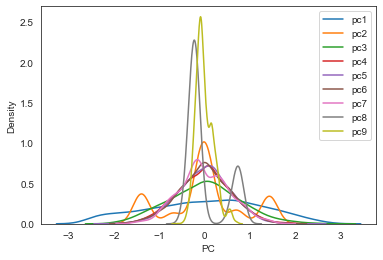

In [41]:
fig, ax = plt.subplots()

for i in range(X_pca.shape[1]):
    sns.kdeplot(X_pca.iloc[:,i],)
plt.legend(['pc{}'.format(i+1) for i in range(X_pca.shape[1])])
ax.set_xlabel('PC')

# Testing Other Algorithms Using Flaml AutoML

In [42]:
def mlfind(X, y):
    automl = AutoML()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
    automl_settings = {
        "time_budget": 60,
        "metric": 'accuracy',
        "task": 'classification',
        "verbose": 5
    }

    automl.fit(X_train, y_train, **automl_settings)
    return (automl.predict(X_test), automl, y_test, X)

In [43]:
pred, mlfound, y_test, i = mlfind(X, y)

[flaml.automl: 08-25 17:45:46] {2540} INFO - task = classification
[flaml.automl: 08-25 17:45:46] {2542} INFO - Data split method: stratified
[flaml.automl: 08-25 17:45:46] {2545} INFO - Evaluation method: cv
[flaml.automl: 08-25 17:45:46] {2664} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 08-25 17:45:46] {2806} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 08-25 17:45:46] {3108} INFO - iteration 0, current learner lgbm
[flaml.tune.tune: 08-25 17:45:46] {513} INFO - trial 1 config: {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}
[flaml.automl: 08-25 17:45:46] {3241} INFO - Estimated sufficient time budget=638s. Estimated necessary time budget=16s.
[flaml.automl: 08-25 17:45:46] {3288} INFO -  at 0.1s,	estimator lgbm's best error=0.7689,	best esti

[flaml.automl: 08-25 17:45:48] {3288} INFO -  at 2.2s,	estimator extra_tree's best error=0.6992,	best estimator extra_tree's best error=0.6992
[flaml.automl: 08-25 17:45:48] {3108} INFO - iteration 18, current learner lgbm
[flaml.tune.tune: 08-25 17:45:48] {513} INFO - trial 1 config: {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 16, 'learning_rate': 0.09870537835675607, 'log_max_bin': 6, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 2.7691823587081092}
[flaml.automl: 08-25 17:45:48] {3288} INFO -  at 2.3s,	estimator lgbm's best error=0.7644,	best estimator extra_tree's best error=0.6992
[flaml.automl: 08-25 17:45:48] {3108} INFO - iteration 19, current learner extra_tree
[flaml.tune.tune: 08-25 17:45:48] {513} INFO - trial 1 config: {'n_estimators': 8, 'max_features': 0.365193307589187, 'max_leaves': 6, 'criterion': 'gini'}
[flaml.automl: 08-25 17:45:49] {3288} INFO -  at 2.5s,	estimator extra_tree's best error=0.6992,	best estimator extra_tree's best e

[flaml.tune.tune: 08-25 17:45:52] {513} INFO - trial 1 config: {'n_estimators': 7, 'max_features': 0.43953855364891564, 'max_leaves': 10, 'criterion': 'gini'}
[flaml.automl: 08-25 17:45:52] {3288} INFO -  at 5.8s,	estimator extra_tree's best error=0.6992,	best estimator extra_tree's best error=0.6992
[flaml.automl: 08-25 17:45:52] {3108} INFO - iteration 38, current learner rf
[flaml.tune.tune: 08-25 17:45:52] {513} INFO - trial 1 config: {'n_estimators': 8, 'max_features': 0.3651933075891869, 'max_leaves': 6, 'criterion': 'entropy'}
[flaml.automl: 08-25 17:45:52] {3288} INFO -  at 6.1s,	estimator rf's best error=0.7022,	best estimator extra_tree's best error=0.6992
[flaml.automl: 08-25 17:45:52] {3108} INFO - iteration 39, current learner rf
[flaml.tune.tune: 08-25 17:45:52] {513} INFO - trial 1 config: {'n_estimators': 27, 'max_features': 0.33925552778367274, 'max_leaves': 4, 'criterion': 'entropy'}
[flaml.automl: 08-25 17:45:52] {3288} INFO -  at 6.4s,	estimator rf's best error=0.70

[flaml.tune.tune: 08-25 17:45:57] {513} INFO - trial 1 config: {'n_estimators': 21, 'max_features': 0.18337720106620536, 'max_leaves': 20, 'criterion': 'entropy'}
[flaml.automl: 08-25 17:45:57] {3288} INFO -  at 11.2s,	estimator rf's best error=0.6808,	best estimator rf's best error=0.6808
[flaml.automl: 08-25 17:45:57] {3108} INFO - iteration 59, current learner rf
[flaml.tune.tune: 08-25 17:45:57] {513} INFO - trial 1 config: {'n_estimators': 24, 'max_features': 0.2985620119644604, 'max_leaves': 20, 'criterion': 'gini'}
[flaml.automl: 08-25 17:45:58] {3288} INFO -  at 11.5s,	estimator rf's best error=0.6808,	best estimator rf's best error=0.6808
[flaml.automl: 08-25 17:45:58] {3108} INFO - iteration 60, current learner lgbm
[flaml.tune.tune: 08-25 17:45:58] {513} INFO - trial 1 config: {'n_estimators': 14, 'num_leaves': 6, 'min_child_samples': 7, 'learning_rate': 0.3914188900469309, 'log_max_bin': 7, 'colsample_bytree': 0.9432523939567112, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.2

[flaml.automl: 08-25 17:46:01] {3108} INFO - iteration 76, current learner xgb_limitdepth
[flaml.tune.tune: 08-25 17:46:01] {513} INFO - trial 1 config: {'n_estimators': 13, 'max_depth': 6, 'min_child_weight': 1.5572666916166369, 'learning_rate': 0.2202446584172858, 'subsample': 0.9079647052885418, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.09803524767356112}
[flaml.automl: 08-25 17:46:02] {3288} INFO -  at 15.7s,	estimator xgb_limitdepth's best error=0.7042,	best estimator rf's best error=0.6808
[flaml.automl: 08-25 17:46:02] {3108} INFO - iteration 77, current learner rf
[flaml.tune.tune: 08-25 17:46:02] {513} INFO - trial 1 config: {'n_estimators': 15, 'max_features': 0.25570398274028544, 'max_leaves': 43, 'criterion': 'entropy'}
[flaml.automl: 08-25 17:46:02] {3288} INFO -  at 16.0s,	estimator rf's best error=0.6808,	best estimator rf's best error=0.6808
[flaml.automl: 08-25 17:46:02] {3108} INFO - iteration 78, current learner rf


[flaml.automl: 08-25 17:46:06] {3288} INFO -  at 19.7s,	estimator xgb_limitdepth's best error=0.7012,	best estimator rf's best error=0.6723
[flaml.automl: 08-25 17:46:06] {3108} INFO - iteration 94, current learner xgboost
[flaml.tune.tune: 08-25 17:46:06] {513} INFO - trial 1 config: {'n_estimators': 4, 'max_leaves': 8, 'min_child_weight': 0.021774833777144415, 'learning_rate': 0.0053255994547876835, 'subsample': 0.8698840181143505, 'colsample_bylevel': 0.8541327686405578, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.33140732495199654}
[flaml.automl: 08-25 17:46:06] {3288} INFO -  at 19.9s,	estimator xgboost's best error=0.7271,	best estimator rf's best error=0.6723
[flaml.automl: 08-25 17:46:06] {3108} INFO - iteration 95, current learner xgboost
[flaml.tune.tune: 08-25 17:46:06] {513} INFO - trial 1 config: {'n_estimators': 4, 'max_leaves': 13, 'min_child_weight': 0.06392820664282951, 'learning_rate': 0.016653978816310172, 'subsample': 0.9958086918368321, 'col

[flaml.tune.tune: 08-25 17:46:10] {513} INFO - trial 1 config: {'n_estimators': 13, 'num_leaves': 18, 'min_child_samples': 9, 'learning_rate': 0.9471649887973266, 'log_max_bin': 5, 'colsample_bytree': 0.8812400691386574, 'reg_alpha': 0.005701836287283991, 'reg_lambda': 0.09455981738843285}
[flaml.automl: 08-25 17:46:10] {3288} INFO -  at 24.3s,	estimator lgbm's best error=0.7356,	best estimator rf's best error=0.6723
[flaml.automl: 08-25 17:46:10] {3108} INFO - iteration 113, current learner xgb_limitdepth
[flaml.tune.tune: 08-25 17:46:10] {513} INFO - trial 1 config: {'n_estimators': 4, 'max_depth': 6, 'min_child_weight': 1.7894351548618146, 'learning_rate': 1.0, 'subsample': 0.9912155745023092, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0019418994107323363, 'reg_lambda': 0.1335303722582357}
[flaml.automl: 08-25 17:46:11] {3288} INFO -  at 24.5s,	estimator xgb_limitdepth's best error=0.7012,	best estimator rf's best error=0.6723
[flaml.automl: 08-25 17:46:11] {3

[flaml.automl: 08-25 17:46:14] {3288} INFO -  at 27.9s,	estimator lgbm's best error=0.7251,	best estimator rf's best error=0.6723
[flaml.automl: 08-25 17:46:14] {3108} INFO - iteration 129, current learner rf
[flaml.tune.tune: 08-25 17:46:14] {513} INFO - trial 1 config: {'n_estimators': 14, 'max_features': 0.21706364297857245, 'max_leaves': 17, 'criterion': 'gini'}
[flaml.automl: 08-25 17:46:14] {3288} INFO -  at 28.3s,	estimator rf's best error=0.6723,	best estimator rf's best error=0.6723
[flaml.automl: 08-25 17:46:14] {3108} INFO - iteration 130, current learner xgboost
[flaml.tune.tune: 08-25 17:46:14] {513} INFO - trial 1 config: {'n_estimators': 9, 'max_leaves': 4, 'min_child_weight': 0.052712738814327996, 'learning_rate': 0.005012895259242563, 'subsample': 0.9891095689457517, 'colsample_bylevel': 0.5535236162492341, 'colsample_bytree': 0.8199624760205224, 'reg_alpha': 0.0009765625, 'reg_lambda': 2.6838863633593952}
[flaml.automl: 08-25 17:46:14] {3288} INFO -  at 28.5s,	estimat

[flaml.automl: 08-25 17:46:19] {3108} INFO - iteration 147, current learner lgbm
[flaml.tune.tune: 08-25 17:46:19] {513} INFO - trial 1 config: {'n_estimators': 14, 'num_leaves': 30, 'min_child_samples': 5, 'learning_rate': 0.1802052935410059, 'log_max_bin': 6, 'colsample_bytree': 0.9730960060774408, 'reg_alpha': 0.048512906017538736, 'reg_lambda': 0.34236954218538423}
[flaml.automl: 08-25 17:46:19] {3288} INFO -  at 32.7s,	estimator lgbm's best error=0.7251,	best estimator rf's best error=0.6723
[flaml.automl: 08-25 17:46:19] {3108} INFO - iteration 148, current learner lgbm
[flaml.tune.tune: 08-25 17:46:19] {513} INFO - trial 1 config: {'n_estimators': 17, 'num_leaves': 21, 'min_child_samples': 3, 'learning_rate': 0.1187292550165694, 'log_max_bin': 5, 'colsample_bytree': 0.8207852383769185, 'reg_alpha': 0.0030098972808130803, 'reg_lambda': 0.0766693167732316}
[flaml.automl: 08-25 17:46:19] {3288} INFO -  at 32.8s,	estimator lgbm's best error=0.7251,	best estimator rf's best error=0.6

[flaml.tune.tune: 08-25 17:46:23] {513} INFO - trial 1 config: {'n_estimators': 7, 'max_leaves': 23, 'min_child_weight': 0.030352036920753934, 'learning_rate': 0.007931147070775831, 'subsample': 0.9136652679236669, 'colsample_bylevel': 0.6185641222534896, 'colsample_bytree': 0.8072709127691782, 'reg_alpha': 0.0009765625, 'reg_lambda': 4.496233939213044}
[flaml.automl: 08-25 17:46:23] {3288} INFO -  at 37.1s,	estimator xgboost's best error=0.7271,	best estimator rf's best error=0.6723
[flaml.automl: 08-25 17:46:23] {3108} INFO - iteration 166, current learner rf
[flaml.tune.tune: 08-25 17:46:23] {513} INFO - trial 1 config: {'n_estimators': 26, 'max_features': 0.25110295334416083, 'max_leaves': 35, 'criterion': 'entropy'}
[flaml.automl: 08-25 17:46:24] {3288} INFO -  at 37.5s,	estimator rf's best error=0.6723,	best estimator rf's best error=0.6723
[flaml.automl: 08-25 17:46:24] {3108} INFO - iteration 167, current learner lrl1
[flaml.tune.tune: 08-25 17:46:24] {513} INFO - trial 1 confi

[flaml.automl: 08-25 17:46:29] {3108} INFO - iteration 190, current learner xgboost
[flaml.tune.tune: 08-25 17:46:29] {513} INFO - trial 1 config: {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.03220866965368074, 'learning_rate': 0.03617041284035871, 'subsample': 0.9758727840721082, 'colsample_bylevel': 0.7627557996553389, 'colsample_bytree': 0.814213208039676, 'reg_alpha': 0.018814285148004904, 'reg_lambda': 0.19489589185645312}
[flaml.automl: 08-25 17:46:29] {3288} INFO -  at 43.1s,	estimator xgboost's best error=0.7271,	best estimator lrl1's best error=0.6499
[flaml.automl: 08-25 17:46:29] {3108} INFO - iteration 191, current learner lrl1
[flaml.tune.tune: 08-25 17:46:29] {513} INFO - trial 1 config: {'C': 1.3452731287668271}
[flaml.automl: 08-25 17:46:29] {3288} INFO -  at 43.3s,	estimator lrl1's best error=0.6499,	best estimator lrl1's best error=0.6499
[flaml.automl: 08-25 17:46:29] {3108} INFO - iteration 192, current learner lrl1
[flaml.tune.tune: 08-25 17:46:29] {5

[flaml.automl: 08-25 17:46:34] {3108} INFO - iteration 215, current learner lrl1
[flaml.tune.tune: 08-25 17:46:34] {513} INFO - trial 1 config: {'C': 1.2079094647189357}
[flaml.automl: 08-25 17:46:35] {3288} INFO -  at 48.5s,	estimator lrl1's best error=0.6499,	best estimator lrl1's best error=0.6499
[flaml.automl: 08-25 17:46:35] {3108} INFO - iteration 216, current learner lrl1
[flaml.tune.tune: 08-25 17:46:35] {513} INFO - trial 1 config: {'C': 0.7503673969908813}
[flaml.automl: 08-25 17:46:35] {3288} INFO -  at 48.7s,	estimator lrl1's best error=0.6499,	best estimator lrl1's best error=0.6499
[flaml.automl: 08-25 17:46:35] {3108} INFO - iteration 217, current learner lrl1
[flaml.tune.tune: 08-25 17:46:35] {513} INFO - trial 1 config: {'C': 1.2015359306920599}
[flaml.automl: 08-25 17:46:35] {3288} INFO -  at 48.9s,	estimator lrl1's best error=0.6499,	best estimator lrl1's best error=0.6499
[flaml.automl: 08-25 17:46:35] {3108} INFO - iteration 218, current learner lrl1
[flaml.tune.t

[flaml.automl: 08-25 17:46:39] {3288} INFO -  at 53.0s,	estimator lrl1's best error=0.6499,	best estimator lrl1's best error=0.6499
[flaml.automl: 08-25 17:46:39] {3108} INFO - iteration 237, current learner lrl1
[flaml.tune.tune: 08-25 17:46:39] {513} INFO - trial 1 config: {'C': 1.1668597741189164}
[flaml.automl: 08-25 17:46:39] {3288} INFO -  at 53.2s,	estimator lrl1's best error=0.6499,	best estimator lrl1's best error=0.6499
[flaml.automl: 08-25 17:46:39] {3108} INFO - iteration 238, current learner lrl1
[flaml.tune.tune: 08-25 17:46:39] {513} INFO - trial 1 config: {'C': 0.7726664409056356}
[flaml.automl: 08-25 17:46:39] {3288} INFO -  at 53.4s,	estimator lrl1's best error=0.6499,	best estimator lrl1's best error=0.6499
[flaml.automl: 08-25 17:46:39] {3108} INFO - iteration 239, current learner lrl1
[flaml.tune.tune: 08-25 17:46:39] {513} INFO - trial 1 config: {'C': 1.1629554289719364}
[flaml.automl: 08-25 17:46:40] {3288} INFO -  at 53.6s,	estimator lrl1's best error=0.6499,	be

[flaml.automl: 08-25 17:46:44] {3288} INFO -  at 58.4s,	estimator lrl1's best error=0.6499,	best estimator lrl1's best error=0.6499
[flaml.automl: 08-25 17:46:44] {3108} INFO - iteration 262, current learner lrl1
[flaml.tune.tune: 08-25 17:46:44] {513} INFO - trial 1 config: {'C': 0.7942999943656924}
[flaml.automl: 08-25 17:46:45] {3288} INFO -  at 58.6s,	estimator lrl1's best error=0.6499,	best estimator lrl1's best error=0.6499
[flaml.automl: 08-25 17:46:45] {3108} INFO - iteration 263, current learner lrl1
[flaml.tune.tune: 08-25 17:46:45] {513} INFO - trial 1 config: {'C': 1.1325958017219278}
[flaml.automl: 08-25 17:46:45] {3288} INFO -  at 58.8s,	estimator lrl1's best error=0.6499,	best estimator lrl1's best error=0.6499
[flaml.automl: 08-25 17:46:45] {3108} INFO - iteration 264, current learner lrl1
[flaml.tune.tune: 08-25 17:46:45] {513} INFO - trial 1 config: {'C': 0.7960416128451923}
[flaml.automl: 08-25 17:46:45] {3288} INFO -  at 59.0s,	estimator lrl1's best error=0.6499,	be

<AxesSubplot:>

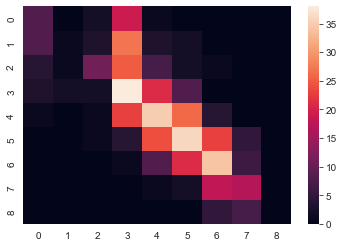

In [44]:
sns.heatmap(confusion_matrix(y_test, pred))

In [45]:
print(classification_report(y_test, pred, zero_division=0))
print('Accuracy of prediction within one sub grade: %.4f' % ((abs(pred-y_test)<=1).sum()/len(y_test)))
print('\nBest model deployed:', mlfound.model.estimator)

              precision    recall  f1-score   support

           0       0.33      0.27      0.30        30
           1       0.25      0.02      0.04        44
           2       0.55      0.22      0.31        51
           3       0.28      0.51      0.36        74
           4       0.35      0.39      0.37        90
           5       0.37      0.39      0.38        93
           6       0.40      0.49      0.44        70
           7       0.49      0.45      0.47        38
           8       0.00      0.00      0.00        12

    accuracy                           0.36       502
   macro avg       0.34      0.30      0.30       502
weighted avg       0.36      0.36      0.34       502

Accuracy of prediction within one sub grade: 0.7729

Best model deployed: LogisticRegression(C=0.9495227162656075, n_jobs=-1, penalty='l1', solver='saga')


In [46]:
print('Model Tested with loss function:', mlfound.best_loss_per_estimator)

Model Tested with loss function: {'lgbm': 0.7231225419039466, 'rf': 0.6723117579186363, 'catboost': 0.7161424796218409, 'xgboost': 0.7221151102343644, 'extra_tree': 0.6977171499112914, 'xgb_limitdepth': 0.70120221833476, 'lrl1': 0.6499063287055993}


# Testing Other Algorithms Using EvalML

In [47]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(
    X, y, problem_type="multiclass", test_size=0.2
)

In [48]:
automl = evalml.AutoMLSearch(
    X_train=X_train,
    y_train=y_train,
    problem_type="multiclass",
    objective="accuracy multiclass",
    max_batches=3,
    verbose=True,
)
automl.search()

Dataset size is too small to create holdout set. Mininum dataset size is 500 rows, X_train has 2008 rows. Holdout set evaluation is disabled.
AutoMLSearch will use mean CV score to rank pipelines.

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Accuracy Multiclass. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 3 batches for a total of None pipelines. 
Allowed model families: 



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Multiclass Classification Pipeline
Mode Baseline Multiclass Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Accuracy Multiclass: 0.181

*****************************
* Evaluating Batch Number 1 *
*****************************

Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Accuracy Multiclass: 0.331
Random Forest Classifier w/ Label Encoder + Imputer + Oversampler:
	Starting cross validation
	Finished cross validation - mean Accuracy Multiclass: 0.315

*****************************
* Evaluating Batch Number 2 *
*****************************

Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + RF Classifier Select From Model:
	Starting cross validation
	Finished cross validation - mean Accuracy Multiclass: 0.305
Random Forest Classifier w/ Label Encoder + Imputer 

{1: {'Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler': '00:03',
  'Random Forest Classifier w/ Label Encoder + Imputer + Oversampler': '00:01',
  'Total time of batch': '00:04'},
 2: {'Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + RF Classifier Select From Model': '00:02',
  'Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model': '00:01',
  'Total time of batch': '00:04'},
 3: {'Elastic Net Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer': '00:00',
  'LightGBM Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer': '00:04',
  'Decision Tree Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer': '00:00',
  'Extra Trees Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer': '00:01',
  'CatBoost Classifier w/ Label Encoder 

In [49]:
automl.rankings

,id,pipeline_name,search_order,validation_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Logistic Regression Classifier w/ Label Encode...,1,0.331167,0.331167,0.018696,14.989180,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,2,Random Forest Classifier w/ Label Encoder + Im...,2,0.315235,0.315235,0.010579,13.395950,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,3,Logistic Regression Classifier w/ Label Encode...,3,0.305287,0.305287,0.016073,12.401223,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,5,Elastic Net Classifier w/ Label Encoder + Impu...,5,0.304293,0.304293,0.019156,12.301794,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,9,CatBoost Classifier w/ Label Encoder + Imputer...,9,0.291341,0.291341,0.012967,11.006552,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,8,Extra Trees Classifier w/ Label Encoder + Impu...,8,0.276395,0.276395,0.007478,9.511932,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,4,Random Forest Classifier w/ Label Encoder + Im...,4,0.268928,0.268928,0.008499,8.765292,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,7,Decision Tree Classifier w/ Label Encoder + Im...,7,0.265434,0.265434,0.017599,8.415843,False,"{'Label Encoder': {'positive_label': None}, 'I..."
8,10,XGBoost Classifier w/ Label Encoder + Imputer ...,10,0.233556,0.233556,0.022027,5.228119,False,"{'Label Encoder': {'positive_label': None}, 'I..."
9,6,LightGBM Classifier w/ Label Encoder + Imputer...,6,0.219611,0.219611,0.017978,3.833597,False,"{'Label Encoder': {'positive_label': None}, 'I..."


In [50]:
automl.describe_pipeline(1)


*********************************************************************************************
* Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler *
*********************************************************************************************

Problem Type: multiclass
Model Family: Linear

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
3. Oversampler
	 * sampling_ratio : 0.25
	 * k_neighbors_default : 5
	 * n_jobs : -1
	 * sampling_ratio_dict : None
	 * k_neighbors : 5
4. Standard Scaler
5. Logistic Regression Classifier
	 * penalty : l2
	 * C : 1.0
	 * n_jobs : -1
	 * multi_class : auto
	 * solver : lbfgs

Training
Training for multiclass problems.
Total training time (including CV): 3.1 seconds

Cross Vali

In [51]:
pipeline = automl.best_pipeline
pipeline.score(X_holdout, y_holdout, ["accuracy multiclass"])

OrderedDict([('Accuracy Multiclass', 0.2948207171314741)])

In [52]:
pred = pipeline.predict(X_holdout)

<AxesSubplot:>

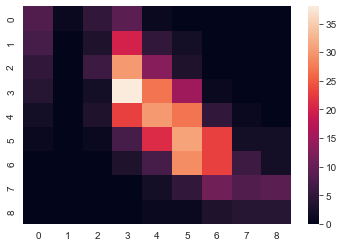

In [53]:
sns.heatmap(confusion_matrix(y_holdout, pred))

In [54]:
print(classification_report(y_holdout, pred, zero_division=0))
print('Accuracy of prediction within one sub grade: %.4f' % ((abs(pred-y_holdout)<=1).sum()/len(y_holdout)))

              precision    recall  f1-score   support

           0       0.30      0.33      0.31        24
           1       0.00      0.00      0.00        37
           2       0.30      0.11      0.16        57
           3       0.29      0.44      0.35        87
           4       0.28      0.33      0.30        91
           5       0.27      0.35      0.31        88
           6       0.35      0.33      0.34        70
           7       0.38      0.23      0.29        35
           8       0.24      0.31      0.27        13

    accuracy                           0.29       502
   macro avg       0.27      0.27      0.26       502
weighted avg       0.28      0.29      0.28       502

Accuracy of prediction within one sub grade: 0.7390


Again, logistic regression is the best fitting model.

# Learning Curve vs. Amount of Data

In [55]:
def random_data_score(X, y, samples, iteration):
    scores = []
    for i in range(iteration):
        rng = np.random.default_rng()
        index = rng.choice(X.index, samples)
        X_n, y_n = X.iloc[index], y.iloc[index]
        pred, y_test = lr(X_n, y_n)
        scores.append([accuracy_score(y_test, pred), ((abs(pred-y_test)<=1).sum()/len(y_test))])
    return np.array(scores)

In [56]:
X_4 = X[['topic_0{}'.format(i+1) for i in range(4)]]

In [57]:
scores_7 = []
scores_4 = []
samples = [100, 200, 300, 400, 500, 700, 900, 1000, 1500, 2000, 2500]

for sample in samples:
    scores_7.append(random_data_score(X, y, sample, 100))
    scores_4.append(random_data_score(X_4, y, sample, 100))

In [59]:
scores_mean_7 = np.array([[i[:,0].mean(), i[:,0].std(), i[:,1].mean(), i[:,1].std()] for i in np.array(scores_7)])
scores_mean_4 = np.array([[i[:,0].mean(), i[:,0].std(), i[:,1].mean(), i[:,1].std()] for i in np.array(scores_4)])

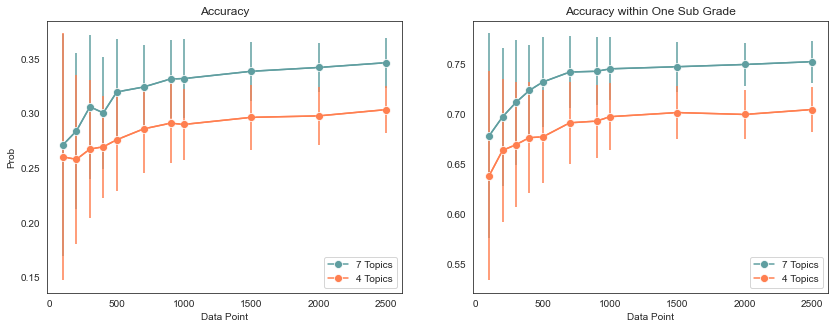

In [65]:
fig, ax = plt.subplots(1,2, figsize=(14,5))


sns.lineplot(y=scores_mean_7[:,0], x=samples, marker='o', ax=ax[0], markersize=8, color='cadetblue')
ax[0].errorbar(samples, scores_mean_7[:,0], yerr=scores_mean_7[:,1], color='cadetblue')
sns.lineplot(y=scores_mean_4[:,0], x=samples, marker='o', ax=ax[0], markersize=8, color='coral')
ax[0].errorbar(samples, scores_mean_4[:,0], yerr=scores_mean_4[:,1], color='coral')

ax[0].set_xlabel('Data Point')
ax[0].set_ylabel('Prob')
ax[0].set_title('Accuracy')

sns.lineplot(y=scores_mean_7[:,2], x=samples, marker='o', ax=ax[1], color='cadetblue', markersize=8)
ax[1].errorbar(samples, scores_mean_7[:,2], yerr=scores_mean_7[:,3], color='cadetblue')
sns.lineplot(y=scores_mean_4[:,2], x=samples, marker='o', ax=ax[1], color = 'coral', markersize=8)
ax[1].errorbar(samples, scores_mean_4[:,2], yerr=scores_mean_4[:,3], color='coral')

ax[1].set_xlabel('Data Point')
ax[1].set_title('Accuracy within One Sub Grade')

ax[0].legend(['7 Topics', '4 Topics'], loc='lower right')
ax[1].legend(['7 Topics', '4 Topics'], loc='lower right')

In [61]:
auc_imp = (scores_mean_7[10][0] - scores_mean_4[7][0])*100
auc_imp_1 = (scores_mean_7[10][2] - scores_mean_4[7][2])*100

print('The improvement from previous dataset containing only topic 1-4: %.2f%%\nOne sub grade difference improvement: %.2f%%' 
      %(auc_imp, auc_imp_1))

The improvement from previous dataset containing only topic 1-4: 5.64%
One sub grade difference improvement: 5.50%
